** *Read the input file* **

In [1]:
import pandas as pd 
df = pd.read_excel('/content/drive/MyDrive/Equintel/esg_sentiment_data_updated_081221.xlsx')


**Calculate the number of misclassifications with the Distilbert model**

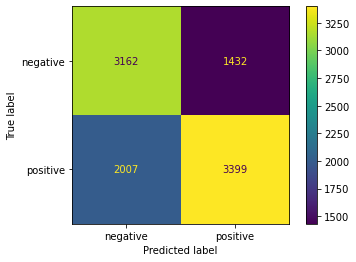

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pylab as pl

cm = confusion_matrix(df['automated_sentiment'], df['distilbert_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()


 *There are a total of 3162 true negatives and 3399 true positives. Hence 6561 sentiments are classified correctly. There are 1432 sentiments which are actually negative but predicted positive. There are 2007 sentiments which are actually positive but predicted negative. Hence there are a total of 3439 misclassifications.*

**Calculate the number of misclassifications for the roBERTa model**

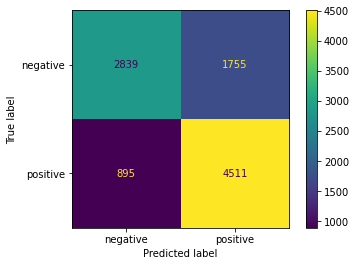

In [8]:
cm = confusion_matrix(df['automated_sentiment'], df['roberta_sentiment'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()

*There are a total of 2839 true negatives and 4511 true positives. Hence 7350 sentiments are classified correctly. There are 1755 sentiments which are actually negative but predicted positive. There are 895 sentiments which are actually positive but predicted negative. Hence there are a total of 2650 misclassifications.*

####
*From the above two comparisons we can see that the roBERTa model performs definitely better in predicting the sentiment.* ####

**Calculate the number of misclassifications for the Finbert model**

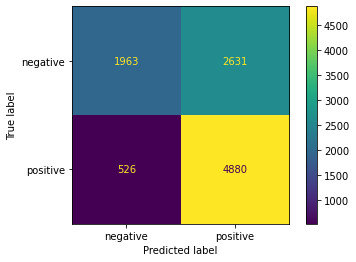

In [11]:
cm = confusion_matrix(df['automated_sentiment'], df['finbert_sentiment_new'])

cmd = ConfusionMatrixDisplay(cm, display_labels=['negative','positive'])
cmd.plot()

There are a total of 1963 true negatives and 4880 true positives. Hence 6843 sentiments are classified correctly. There are 2631 sentiments which are actually negative but predicted positive. There are 526 sentiments which are actually positive but predicted negative. Hence there are a total of 3157 misclassifications.

**Find number of records which are predicted the same in both the models(Distilbert and Roberta): **

In [12]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']):    
    count+=1
print(count)

7303


A total of 7303 records are classified correctly by both the models. 

**Find number of records which are predicted the same in models like Distilbert and Roberta and equal to the True automated sentiment (Ground truth) **

In [ ]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['automated_sentiment'] == row['distilbert_sentiment']) :    
    count+=1
print(count)

5607


*A total of 5607 records are predicted correctly as the ground truth in the Distilbert and Roberta model.*

 **Find records which are predicted the same in all three models **


In [13]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['roberta_sentiment'] == row['finbert_sentiment_new']):    
    count+=1
print(count)

5886


*A total of only 5886 records match in all the three models. *


Now, let's have a look at where the three models agree to the Ground truth:** 

In [14]:
count=0
for index,row in df.iterrows(): 
  if (row['distilbert_sentiment'] == row['roberta_sentiment']) and (row['roberta_sentiment'] == row['finbert_sentiment_new'] and (row['finbert_sentiment_new'] == row['automated_sentiment'])):    
    count+=1
print(count)

4686


Hence we see a total of 4686 records which have the same predicted values by the three models. 

**Calculation of Performance metrics**

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Distilbert Model:** 

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['distilbert_sentiment'])
print('F1 score: %f' % f1)

Accuracy: 0.656100
Precision: 0.703581
Recall: 0.628746
F1 score: 0.664062


**roBERTa Model:** 

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['roberta_sentiment'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['roberta_sentiment'])
print('F1 score: %f' % f1)

Accuracy: 0.735000
Precision: 0.719917
Recall: 0.834443
F1 score: 0.772961


**Finbert Model:**

In [16]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df['automated_sentiment'], df['finbert_sentiment_new'])
print('F1 score: %f' % f1)

Accuracy: 0.684300
Precision: 0.649714
Recall: 0.902701
F1 score: 0.755593
